# Instance segmentation with Mask R-CNN object detection

In this example, we'll demonstrate Mask R-CNN semantic segmentation using the pretrained PyTorch Faster R-CNN model. The model is trained using the COCO dataset.

Let's start with the imports:

In [1]:
import os.path

import cv2
import numpy as np
import requests
import torchvision
import torchvision.transforms as transforms

Next, we'll declare a list of COCO class names (necessary for visualizing the detected objects later):

In [2]:
classes = [
    'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack',
    'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk',
    'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']

Then, we'll download the input image:

In [3]:
image_file = 'source_2.png'
if not os.path.isfile(image_file):
    url = "https://github.com/ivan-vasilev/advanced-deep-learning-with-python/blob/master/chapter04-detection-segmentation/source_2.png"
    r = requests.get(url)
    with open(image_file, 'wb') as f:
        f.write(r.content)

Next, we'll load the `torchvision.models.detection.maskrcnn_resnet50_fpn` pretrained `model`:

In [4]:
# load the pytorch model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

# set the model in evaluation mode
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
         

Then, we'll feed the input `img` to the `model` to produce the segmented objects:

In [5]:
# read the image file
img = cv2.imread(image_file)

# transform the input to tensor
transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])
nn_input = transform(img)
output = model([nn_input])

Next, we'll filter the bounding boxes (+ segmentation masks) and we'll plot them along with the class labels over the input image:

In [6]:
# iterate over the network output for all boxes
for mask, box, score in zip(output[0]['masks'].detach().numpy(),
                            output[0]['boxes'].detach().numpy(),
                            output[0]['scores'].detach().numpy()):

    # filter the boxes by score
    if score > 0.5:
        # transform bounding box format
        box = [(box[0], box[1]), (box[2], box[3])]

        # overlay the segmentation mask on the image with random color
        img[(mask > 0.5).squeeze(), :] = np.random.uniform(0, 255, size=3)

        # draw the bounding box
        cv2.rectangle(img=img,
                      pt1=box[0],
                      pt2=box[1],
                      color=(255, 255, 255),
                      thickness=2)

Finally, we'll display the result using `matplotlib` for it's integration with jupyter:

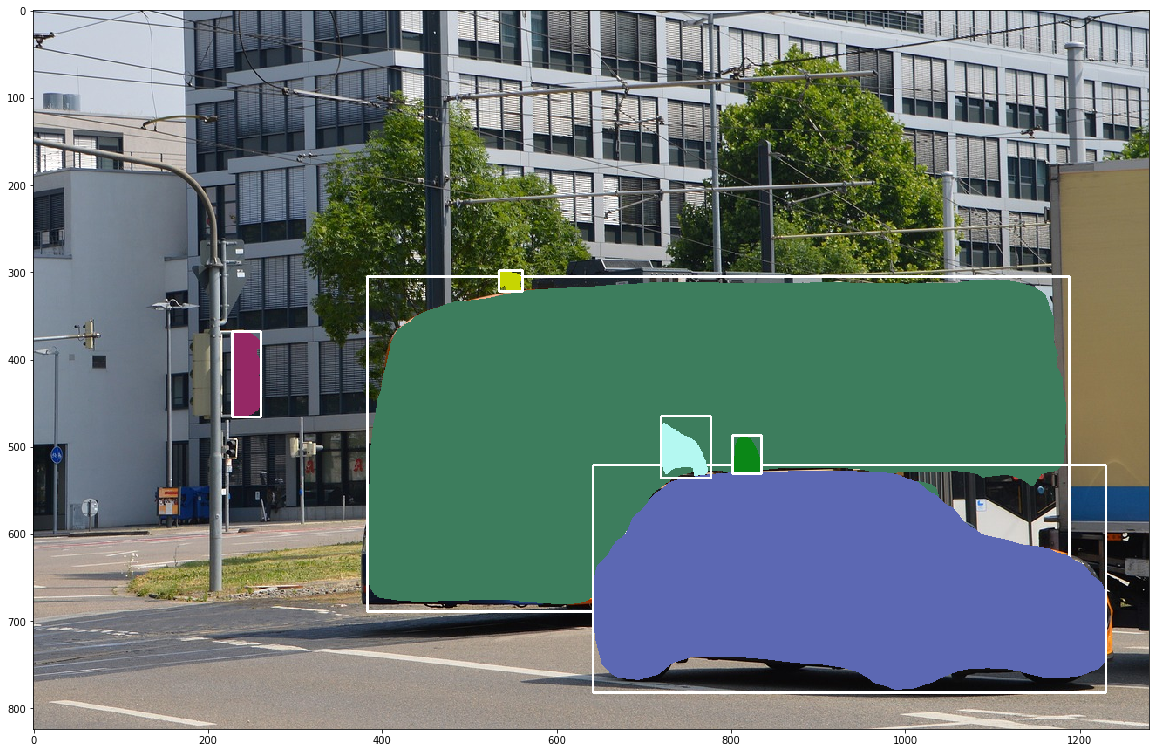

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))